### 0. Importando modulos y datos

In [23]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

In [24]:
Xtrain = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtrain_norm.csv')
Xtest = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtest_norm.csv')
ytrain = pd.read_csv('../data/processed/SplitData/Clean_ytrain.csv')
ytest = pd.read_csv('../data/processed/SplitData/Clean_ytest.csv')

### 1. Random Forest 
#### 1.1 Train

In [25]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(Xtrain, ytrain)

C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

#### 1.2 Prediccion y test

In [26]:
ypred = random_forest.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7359307359307359


El random forest ha mejorado la precisión en comparación con el decision tree optimizado.

### 2. Impacto de los hyperparametros

In [27]:
n_estimators_values = [50, 75, 100, 150, 200, 300, 500, 800]
bootstrap_values = [True, False]

accuracy_matrix = np.zeros((len(n_estimators_values), len(bootstrap_values)))

for i, n_estimators in enumerate(n_estimators_values):
    for j, bootstrap in enumerate(bootstrap_values):
        random_forest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=bootstrap, random_state=42)        
        random_forest.fit(Xtrain, ytrain)
        
        ypred = random_forest.predict(Xtest)    
        accuracy = accuracy_score(ytest, ypred)
        
        accuracy_matrix[i, j] = accuracy


C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed

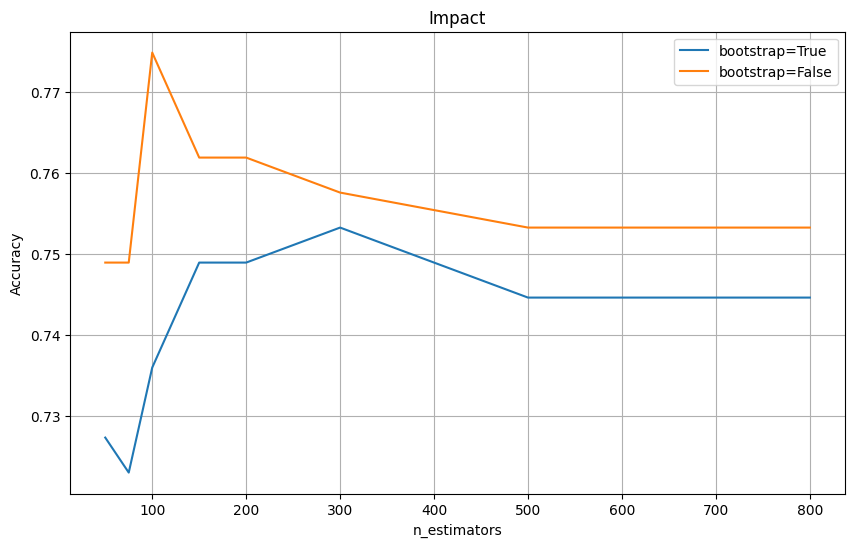

In [28]:
plt.figure(figsize=(10, 6))
for j, bootstrap in enumerate(bootstrap_values):
    plt.plot(n_estimators_values, accuracy_matrix[:, j], label=f"bootstrap={bootstrap}")

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Impact')
plt.legend()
plt.grid(True)

Configurar Bootstrap en False siempre resulta en una mejor precisión. Si fijamos esta opción, la precisión aumenta hasta llegar a 100 árboles, pero luego decae exponencialmente, estabilizándose a partir de 500 árboles. Si configuramos Bootstrap en True, la mejor precisión se logra con 300 árboles y luego comienza a decaer debido al sobreajuste del modelo, estabilizándose también a partir de 500 árboles.

Si incluimos ahora max_features en esta comparativa:

In [29]:
max_features_values = ['sqrt', 'log2', None]

accuracy_matrix = np.zeros((len(n_estimators_values), len(bootstrap_values), len(max_features_values)))

for i, n_estimators in enumerate(n_estimators_values):
    for j, bootstrap in enumerate(bootstrap_values):
        for k, max_features in enumerate(max_features_values):
            random_forest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=bootstrap, max_features=max_features, random_state=42)
            random_forest.fit(Xtrain, ytrain)
            
            ypred = random_forest.predict(Xtest)
            accuracy = accuracy_score(ytest, ypred)
            
            accuracy_matrix[i, j, k] = accuracy

C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed

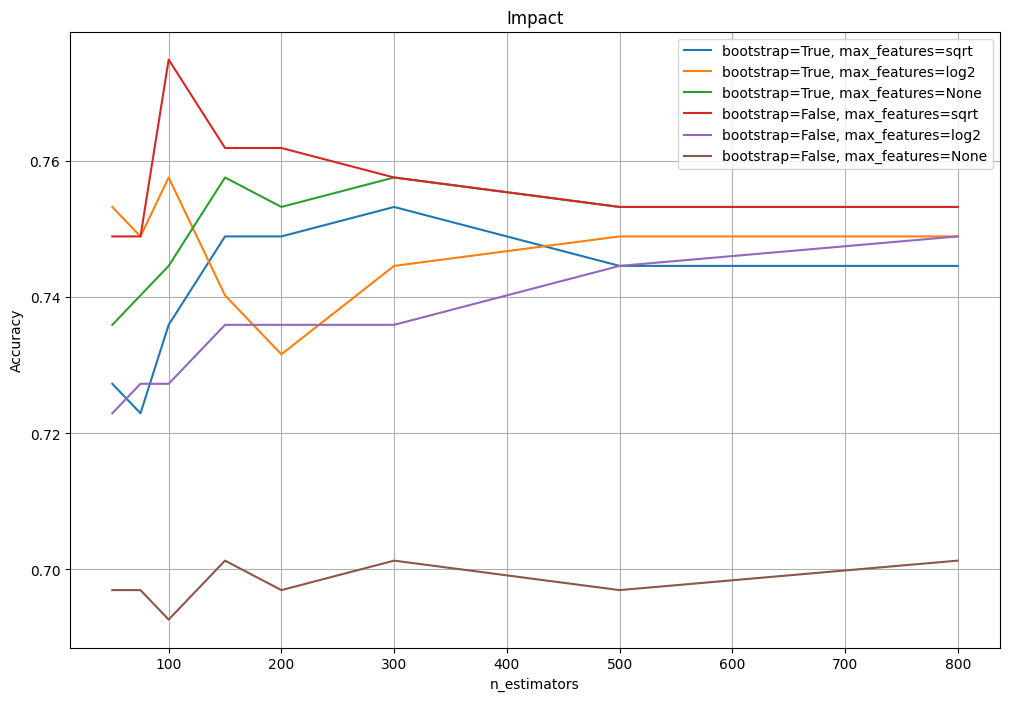

In [30]:
plt.figure(figsize=(12, 8))
for j, bootstrap in enumerate(bootstrap_values):
    for k, max_features in enumerate(max_features_values):
        plt.plot(n_estimators_values, accuracy_matrix[:, j, k], label=f"bootstrap={bootstrap}, max_features={max_features}")

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Impact')
plt.legend()
plt.grid(True)

Vemos que la mejor combinación es n_estimators = 100, bootstrap=False y max_features=sqrt, lo cual coincide con la mejor opción de la comparación anterior, ya que sqrt es el valor predeterminado de max_features.

In [31]:
optimal_model = RandomForestClassifier(n_estimators=100, bootstrap=False, max_features='sqrt', random_state=42)
optimal_model.fit(Xtrain, ytrain)
dump(optimal_model, open("../data/processed/Models/RForest-n_100-bootstrap_F-maxf_sqrt.sav", "wb"))

C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
